In [ ]:

!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d srinivasbece/dogs-vs-cats

!unzip -q dogs-vs-cats.zip -d /content/dogs-vs-cats


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/srinivasbece/dogs-vs-cats
License(s): unknown


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "/content/dogs-vs-cats/dogs-vs-cats2800"
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = data_gen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    class_mode='sparse'
)

val_gen = data_gen.flow_from_directory(
    os.path.join(dataset_path, 'validation'),
    target_size=(224, 224),
    batch_size=32,
    subset='validation',
    class_mode='sparse'
)


Found 3200 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [ ]:
import os

train_dir = '/content/dogs-vs-cats/dogs-vs-cats2800/train'
val_dir = '/content/dogs-vs-cats/dogs-vs-cats2800/validation'

print("Train directory contents:")
print(os.listdir(train_dir))

print("\nValidation directory contents:")
print(os.listdir(val_dir))

Train directory contents:
['cats', 'dogs']

Validation directory contents:
['cats', 'dogs']


In [ ]:
from tensorflow.keras.applications import MobileNet, MobileNetV2, MobileNetV3Small
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential

def build_model(base_model):
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

mobilenet_models = [
    MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet'),
    MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet'),
    MobileNetV3Small(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
]

for base_model in mobilenet_models:
    model = build_model(base_model)
    model.fit(train_gen, validation_data=val_gen, epochs=5)


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 124ms/step - accuracy: 0.8895 - loss: 0.3751 - val_accuracy: 0.8531 - val_loss: 0.8394
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9692 - loss: 0.0788 - val_accuracy: 0.9594 - val_loss: 0.1300
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.9930 - loss: 0.0216 - val_accuracy: 0.9844 - val_loss: 0.0319
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.9912 - loss: 0.0326 - val_accuracy: 0.9563 - val_loss: 0.1753
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9830 - loss: 0.0485 - val_accuracy: 0.8219 - val_loss: 1.2781
Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 140ms/step - accuracy: 0.8878 - loss: 0.3013 - val_accuracy: 0.7125 - val_loss: 6.7875
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.9583 - loss: 0.1097 - val_accuracy: 0.6344 - val_loss: 8.1033
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.9735 - loss: 0.0790 - va

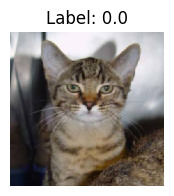

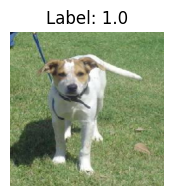

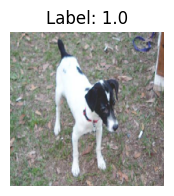

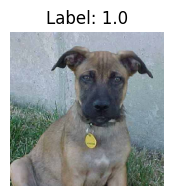

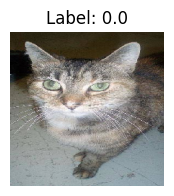

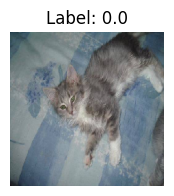

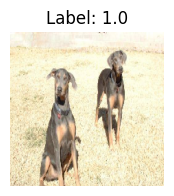

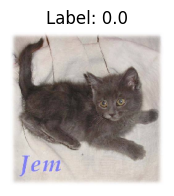

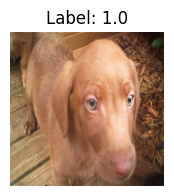

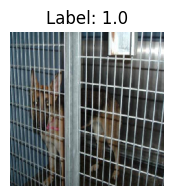

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_examples(generator, num_examples=5):
    batch_x, batch_y = next(generator)
    for i in range(num_examples):
        plt.figure(figsize=(2, 2))
        plt.imshow(batch_x[i])
        plt.title(f'Label: {batch_y[i]}')
        plt.axis('off')
        plt.show()

plot_examples(train_gen)
plot_examples(val_gen)
